In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [4]:
df=pd.read_csv("housing_1.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
MEDV       0
dtype: int64

In [6]:
df.mean()

crim         3.613524
zn          11.363636
indus       11.136779
chas         0.069170
nox          0.554695
rm           6.284634
age         68.574901
dis          3.795043
rad          9.549407
tax        408.237154
ptratio     18.455534
b          356.674032
lstat       12.653063
MEDV        22.532806
dtype: float64

In [7]:
x=df.drop("MEDV", axis=1)
y=df["MEDV"]

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

x_scaled=scaler.fit_transform(x)

In [9]:
x_scaled

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        2.87234043e-01, 1.00000000e+00, 8.96799117e-02],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 1.00000000e+00, 2.04470199e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 9.89737254e-01, 6.34657837e-02],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.07891832e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 9.91300620e-01, 1.31070640e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.69701987e-01]])

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x_scaled,y, test_size=0.3, random_state=42)

In [12]:
x_train.shape

(354, 13)

In [13]:
x_train[0].shape

(13,)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
model=Sequential()
model.add(Dense(128, activation= 'relu', input_shape= x_train[0].shape))
model.add(Dense(64, activation= 'relu'))
model.add(Dense(32, activation= 'relu'))
model.add(Dense(16, activation= 'relu'))
model.add(Dense(1, activation= 'linear'))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [29]:
history=model.fit(x_train,y_train, epochs=50, validation_split=0.05, verbose=1)

Epoch 1/50
11/11 [==============================] - 0s 18ms/step - loss: 8.5215 - mae: 2.0880 - val_loss: 39.1070 - val_mae: 3.8849
Epoch 2/50
11/11 [==============================] - 0s 11ms/step - loss: 8.4963 - mae: 2.0730 - val_loss: 40.6883 - val_mae: 3.8995
Epoch 3/50
11/11 [==============================] - 0s 11ms/step - loss: 8.4250 - mae: 2.0751 - val_loss: 39.1162 - val_mae: 3.8299
Epoch 4/50
11/11 [==============================] - 0s 11ms/step - loss: 8.3048 - mae: 2.0433 - val_loss: 40.5849 - val_mae: 3.8444
Epoch 5/50
11/11 [==============================] - 0s 10ms/step - loss: 8.3281 - mae: 2.0958 - val_loss: 38.9761 - val_mae: 4.0025
Epoch 6/50
11/11 [==============================] - 0s 10ms/step - loss: 8.3845 - mae: 2.0650 - val_loss: 36.5147 - val_mae: 3.6928
Epoch 7/50
11/11 [==============================] - 0s 10ms/step - loss: 8.2923 - mae: 2.0863 - val_loss: 39.2290 - val_mae: 3.7889
Epoch 8/50
11/11 [==============================] - 0s 11ms/step - loss: 8.0

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12673 (49.50 KB)
Trainable params: 12673 (49.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
mse,mae=model.evaluate(x_test,y_test)
print("mse",mse)
print("mae",mae)


5/5 [==============================] - 0s 3ms/step - loss: 10.9442 - mae: 2.2528
mse 10.944244384765625
mae 2.2528045177459717


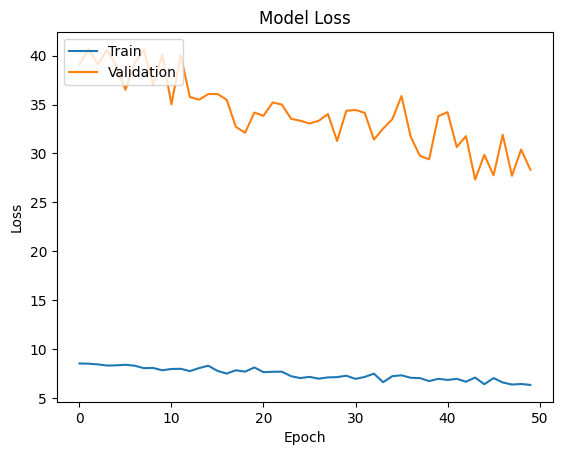

In [32]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
